In [10]:
import pandas as pd
import imageio
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [8]:
def get_bucket(num_buckets, x, y, width, height):
    num_buckets = int(sqrt(num_buckets))
    delta_width = width / num_buckets
    delta_height = height / num_buckets
    for i in range(num_buckets):
        if i == (num_buckets - 1):
            for j in range(num_buckets):
                if j == (num_buckets - 1):
                    return num_buckets * j + i
                if y <= (j + 1) * delta_height:
                    return num_buckets * j + i
        if x <= (i + 1) * delta_width:
            for j in range(num_buckets):
                if j == (num_buckets - 1):
                    return num_buckets * j + i
                if y <= (j + 1) * delta_height:
                    return (num_buckets * j + i)

In [13]:
# Columns: Frame, Brake, GazeX, GazeY
dataFile = './data/cleaned_data.csv'
df = pd.read_csv(dataFile, delimiter='\t')

filename = 'data/driving.avi'
vid = imageio.get_reader(filename,  'ffmpeg')

midx = 450
width = 244
midx_lower = midx - width / 2
midx_upper = midx + width / 2

# Drop the ones that are outside of the range we're considering
df = df.drop(df[df['GazeX'] < midx_lower].index)
df = df.drop(df[df['GazeX'] > midx_upper].index)
df = df.drop(df[df['GazeY'] <= 0].index)
df = df.drop(df[df['GazeY'] > 244].index)
df = df.reset_index(drop=True)
df = df.dropna()

gazes = np.zeros((len(df), 2))

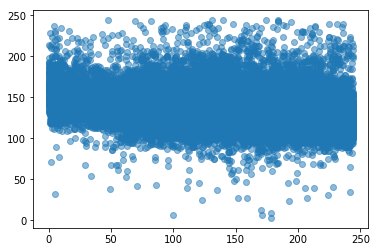

In [16]:
for i, row in df.iterrows():
    x = row['GazeX']
    y = row['GazeY']
    gazes[i, 0] = x
    gazes[i, 1] = y

gazes[:, 0] = gazes[:, 0] - gazes[:, 0].min()
plt.scatter(gazes[:, 0], gazes[:, 1], alpha=0.5)
plt.show()

In [17]:
buckets = np.zeros((len(df), 1))
for i, gaze in enumerate(gazes):
    buckets[i] = get_bucket(4, gaze[0], gaze[1], gazes[:, 0].max(), gazes[:, 1].max())

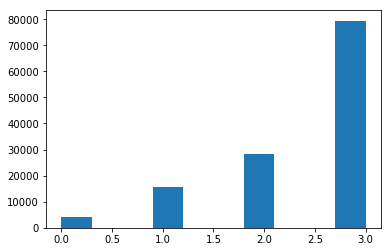

In [18]:
plt.hist(buckets)
plt.show()

In [25]:
mid_x = np.mean(gazes[:, 0])
mid_y = np.mean(gazes[:, 1])

In [26]:
trq = 0
tlq = 0
brq = 0
blq = 0
for gaze in gazes:
    x = gaze[0]
    y = gaze[1]
    if x < mid_x:
        if y < mid_y:
            blq += 1
        else:
            tlq += 1
    else:
        if y < mid_y:
            brq += 1
        else:
            trq += 1

In [27]:
trq, tlq, brq, blq

(24537, 31598, 33499, 38176)